In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
Td= '/content/drive/MyDrive/Colab Notebooks/Obfuscated-MalMem2022.csv'

td = pd.read_csv(Td)

In [ ]:
td

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

In [ ]:
def find_category(column):
    if pd.isna(column):  # Gérer les valeurs NaN ou None
        return column
    return column.partition("-")[0]

td = td.assign(Category_v0=td['Category'].apply(find_category))

In [ ]:
td = td.drop(columns='Class')


In [ ]:
td

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

In [ ]:
# One hot-encodage pour l'attribut Class
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
td['Class'] = encoder.fit_transform(td['Category_v0'])
td
# Pour afficher la correspondance Numero_Class, on cree un nouveau dataframe qui va contenir le resultat
correspondence_td = pd.DataFrame({
    'Original': encoder.classes_,
    'Class': range(len(encoder.classes_))
})
correspondence_td


Original  Class
0      Benign      0
1  Ransomware      1
2     Spyware      2
3      Trojan      3

In [ ]:
td

Category  pslist.nproc  ...  Category_v0  Class
0                                                 Benign            45  ...       Benign      0
1                                                 Benign            47  ...       Benign      0
2                                                 Benign            40  ...       Benign      0
3                                                 Benign            32  ...       Benign      0
4                                                 Benign            42  ...       Benign      0
...                                                  ...           ...  ...          ...    ...
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37  ...   Ransomware      1
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37  ...   Ransomware      1
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38  ...   Ransomware      1
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37  ...   Ransomware      1
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38  ...   Ransomware      1

[58596 rows x 58 columns]

In [ ]:
# Suppression des attributs nominaux
colonne_a_netoyer = ['Category','Category_v0']
td = td.drop(columns=colonne_a_netoyer)
td

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                45            17           10.555556                   0   
1                47            19           11.531915                   0   
2                40            14           14.725000                   0   
3                32            13           13.500000                   0   
4                42            16           11.452381                   0   
...             ...           ...                 ...                 ...   
58591            37            15           10.108108                   0   
58592            37            14            9.945946                   0   
58593            38            15            9.842105                   0   
58594            37            15           10.243243                   0   
58595            38            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0                  9129                    212.302326              0  ...   
1                 11385                    242.234043              0  ...   
2                 11529                    288.225000              0  ...   
3                  8457                    264.281250              0  ...   
4                 11816                    281.333333              0  ...   
...                 ...                           ...            ...  ...   
58591              7973                    215.486487              0  ...   
58592              7038                    190.216216              0  ...   
58593              7982                    215.729730              0  ...   
58594              7974                    215.513513              0  ...   
58595              8095                    213.026316              0  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58594                     221                  26                        24   
58595                     221                  26                        24   

       svcscan.shared_process_services  svcscan.interactive_process_services  \
0                                  116                                     0   
1                                  118                                     0   
2                                  118                                     0   
3                      

In [ ]:
td.shape

(58596, 56)

In [ ]:
td["Class"].value_counts()

Class
0    29298
2    10020
1     9791
3     9487
Name: count, dtype: int64

In [ ]:
td.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0            45            17           10.555556                   0   
1            47            19           11.531915                   0   
2            40            14           14.725000                   0   
3            32            13           13.500000                   0   
4            42            16           11.452381                   0   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0              9129                    212.302326              0  ...   
1             11385                    242.234043              0  ...   
2             11529                    288.225000              0  ...   
3              8457                    264.281250              0  ...   
4             11816                    281.333333              0  ...   

   svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                     221                  26                        24   
1                     222                  26                        24   
2                     222                  26                        27   
3                     222                  26                        27   
4                     222                  26                        24   

   svcscan.shared_process_services  svcscan.interactive_process_services  \
0                              116                                     0   
1                              118                                     0   
2                              118                                     0   
3                              118                                     0   
4                              118                                     0   

   svcscan.nactive  callbacks.ncallbacks  callbacks.nanonymous  \
0              121                    87                     0   
1              122                    87                     0   
2              120                    88                     0   
3              120                    88                     0   
4              124                    87                     0   

   callbacks.ngeneric  Class  
0                   8      0  
1                   8      0  
2                   8      0  
3                   8      0  
4                   8      0  

[5 rows x 56 columns]

In [ ]:
numerical_features = td.select_dtypes(include=[np.number]).columns.tolist()

print(len(numerical_features))

56


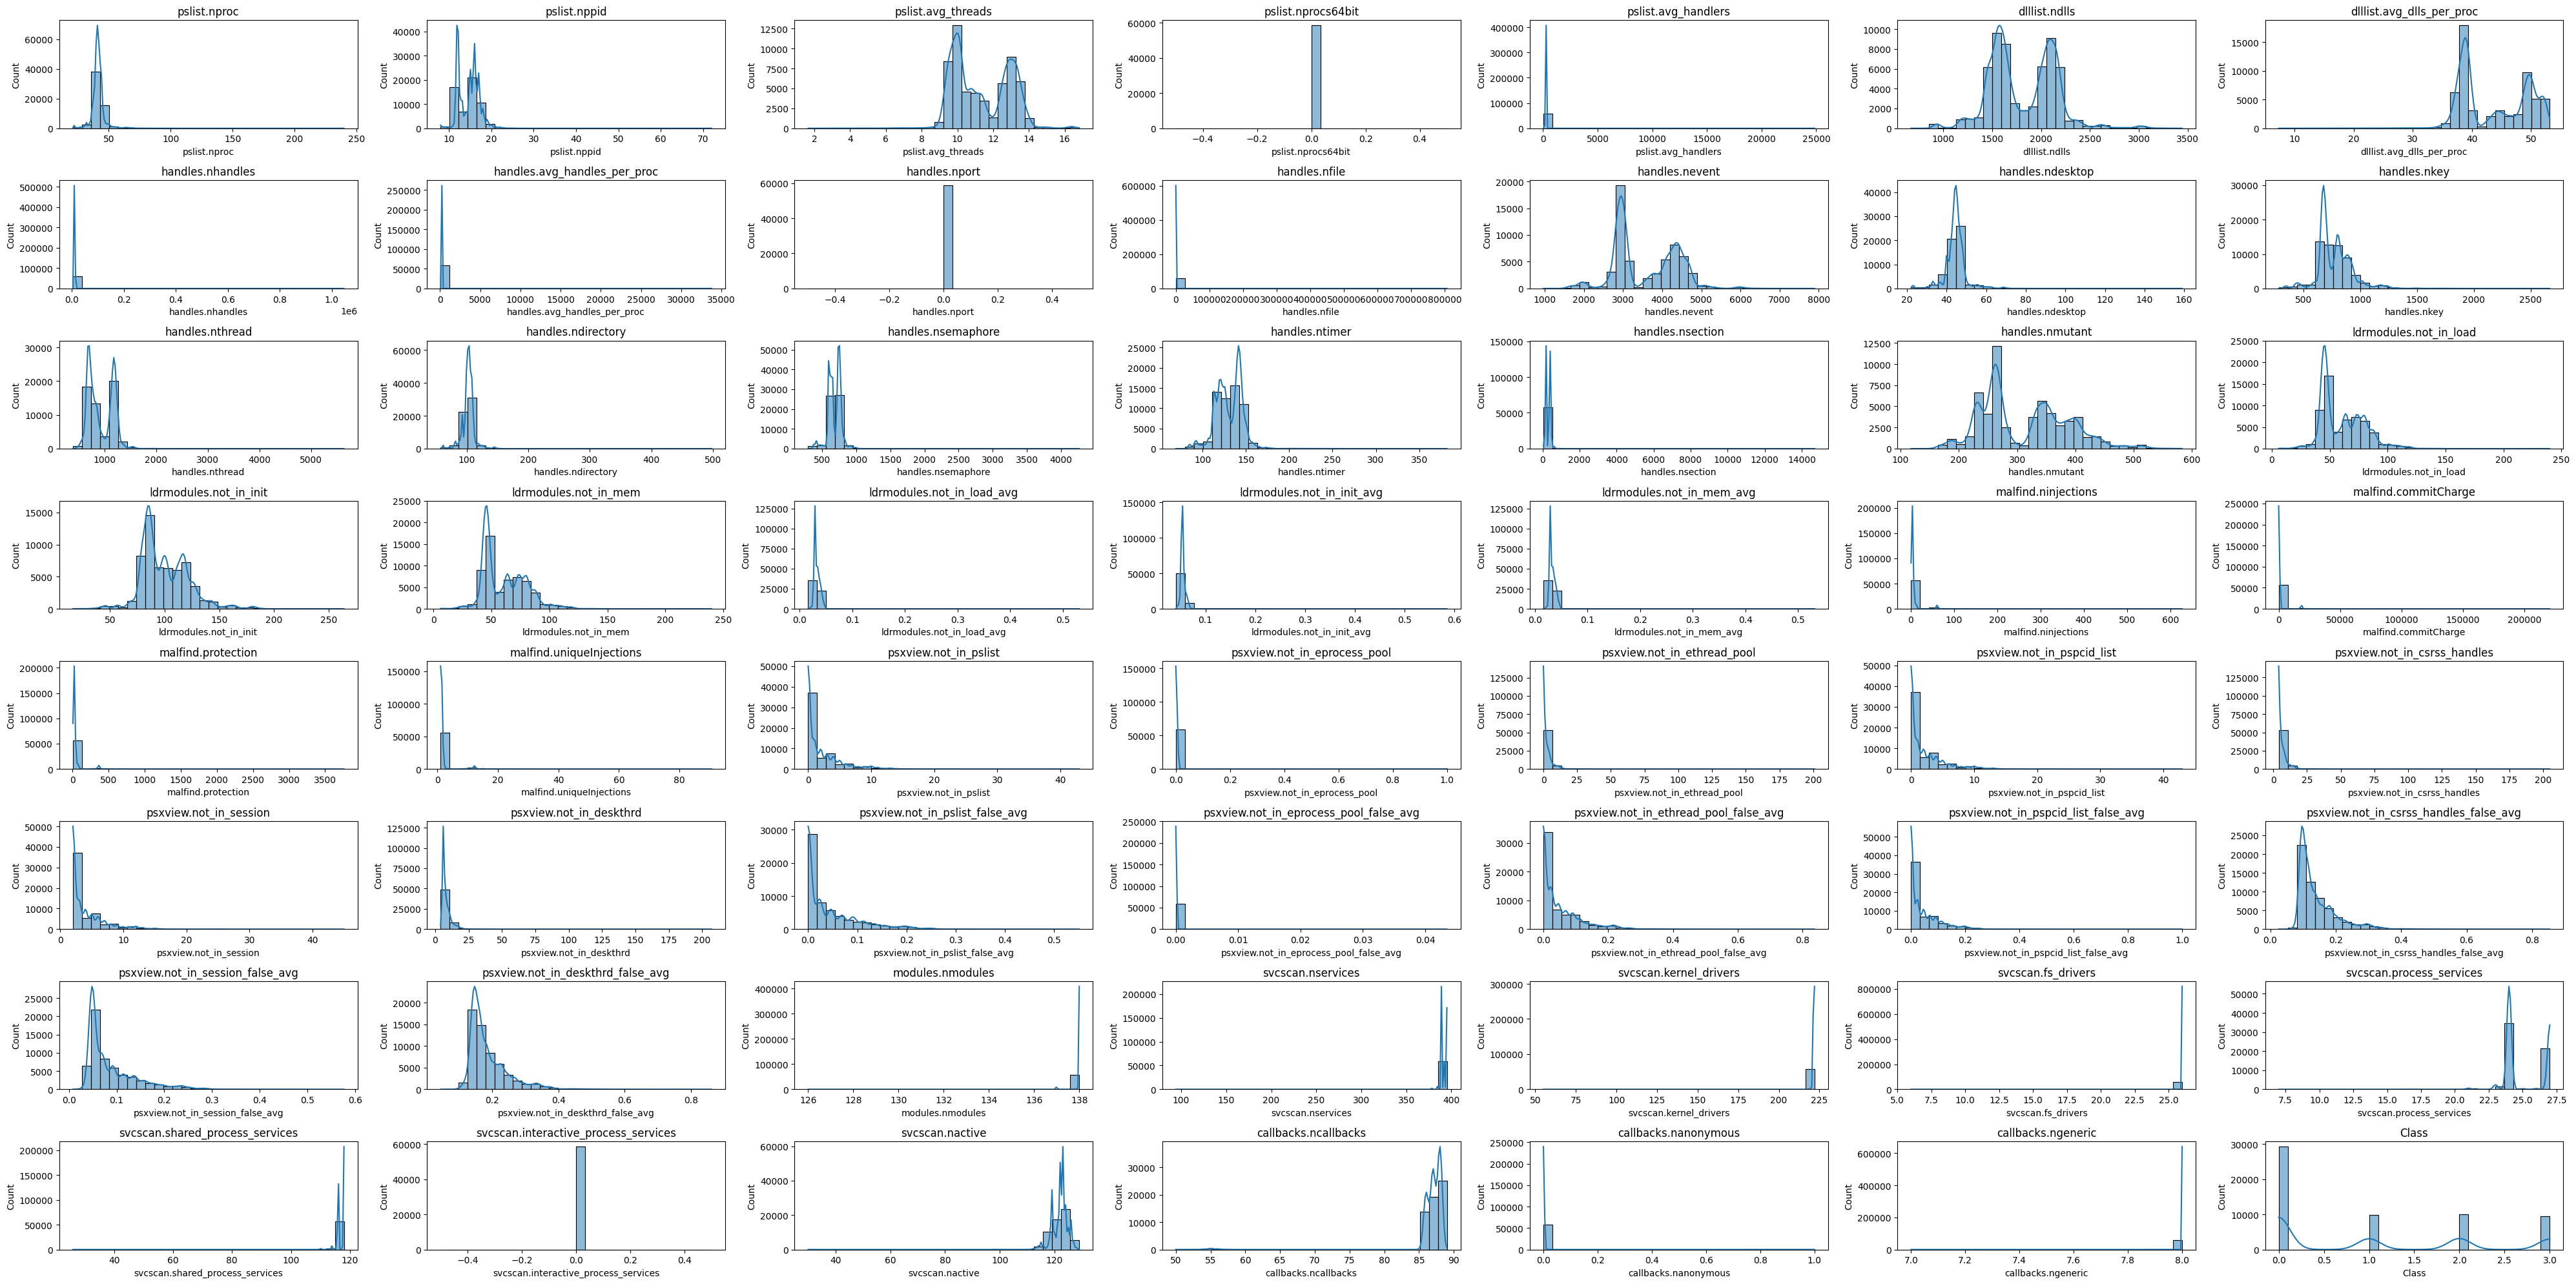

In [ ]:
import seaborn as sns
#plot to display distribution of numerical columns in the dataset
plt.figure(figsize=(40, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 7, i)
    sns.histplot(td[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


In [ ]:
# Identifier les colonnes ayant toutes les mêmes valeurs
columns_with_constant_values = [col for col in td.columns if td[col].nunique() == 1]

# Afficher les colonnes identifiées
print("Colonnes avec les mêmes valeurs dans chaque ligne :", columns_with_constant_values)

Colonnes avec les mêmes valeurs dans chaque ligne : ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']


In [ ]:
print(td['svcscan.interactive_process_services'])

0        0
1        0
2        0
3        0
4        0
        ..
58591    0
58592    0
58593    0
58594    0
58595    0
Name: svcscan.interactive_process_services, Length: 58596, dtype: int64


In [ ]:
td.drop(columns=columns_with_constant_values, inplace=True)

In [ ]:
td.columns

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eproc

<Axes: >

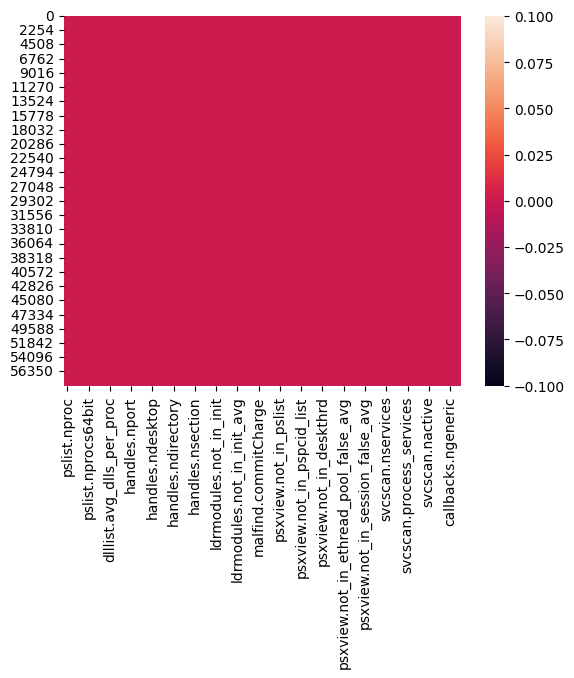

In [ ]:
#visualisation graphique des valeurs manquantes

import seaborn as sn
sn.heatmap(td.isna())

**Entrainement**

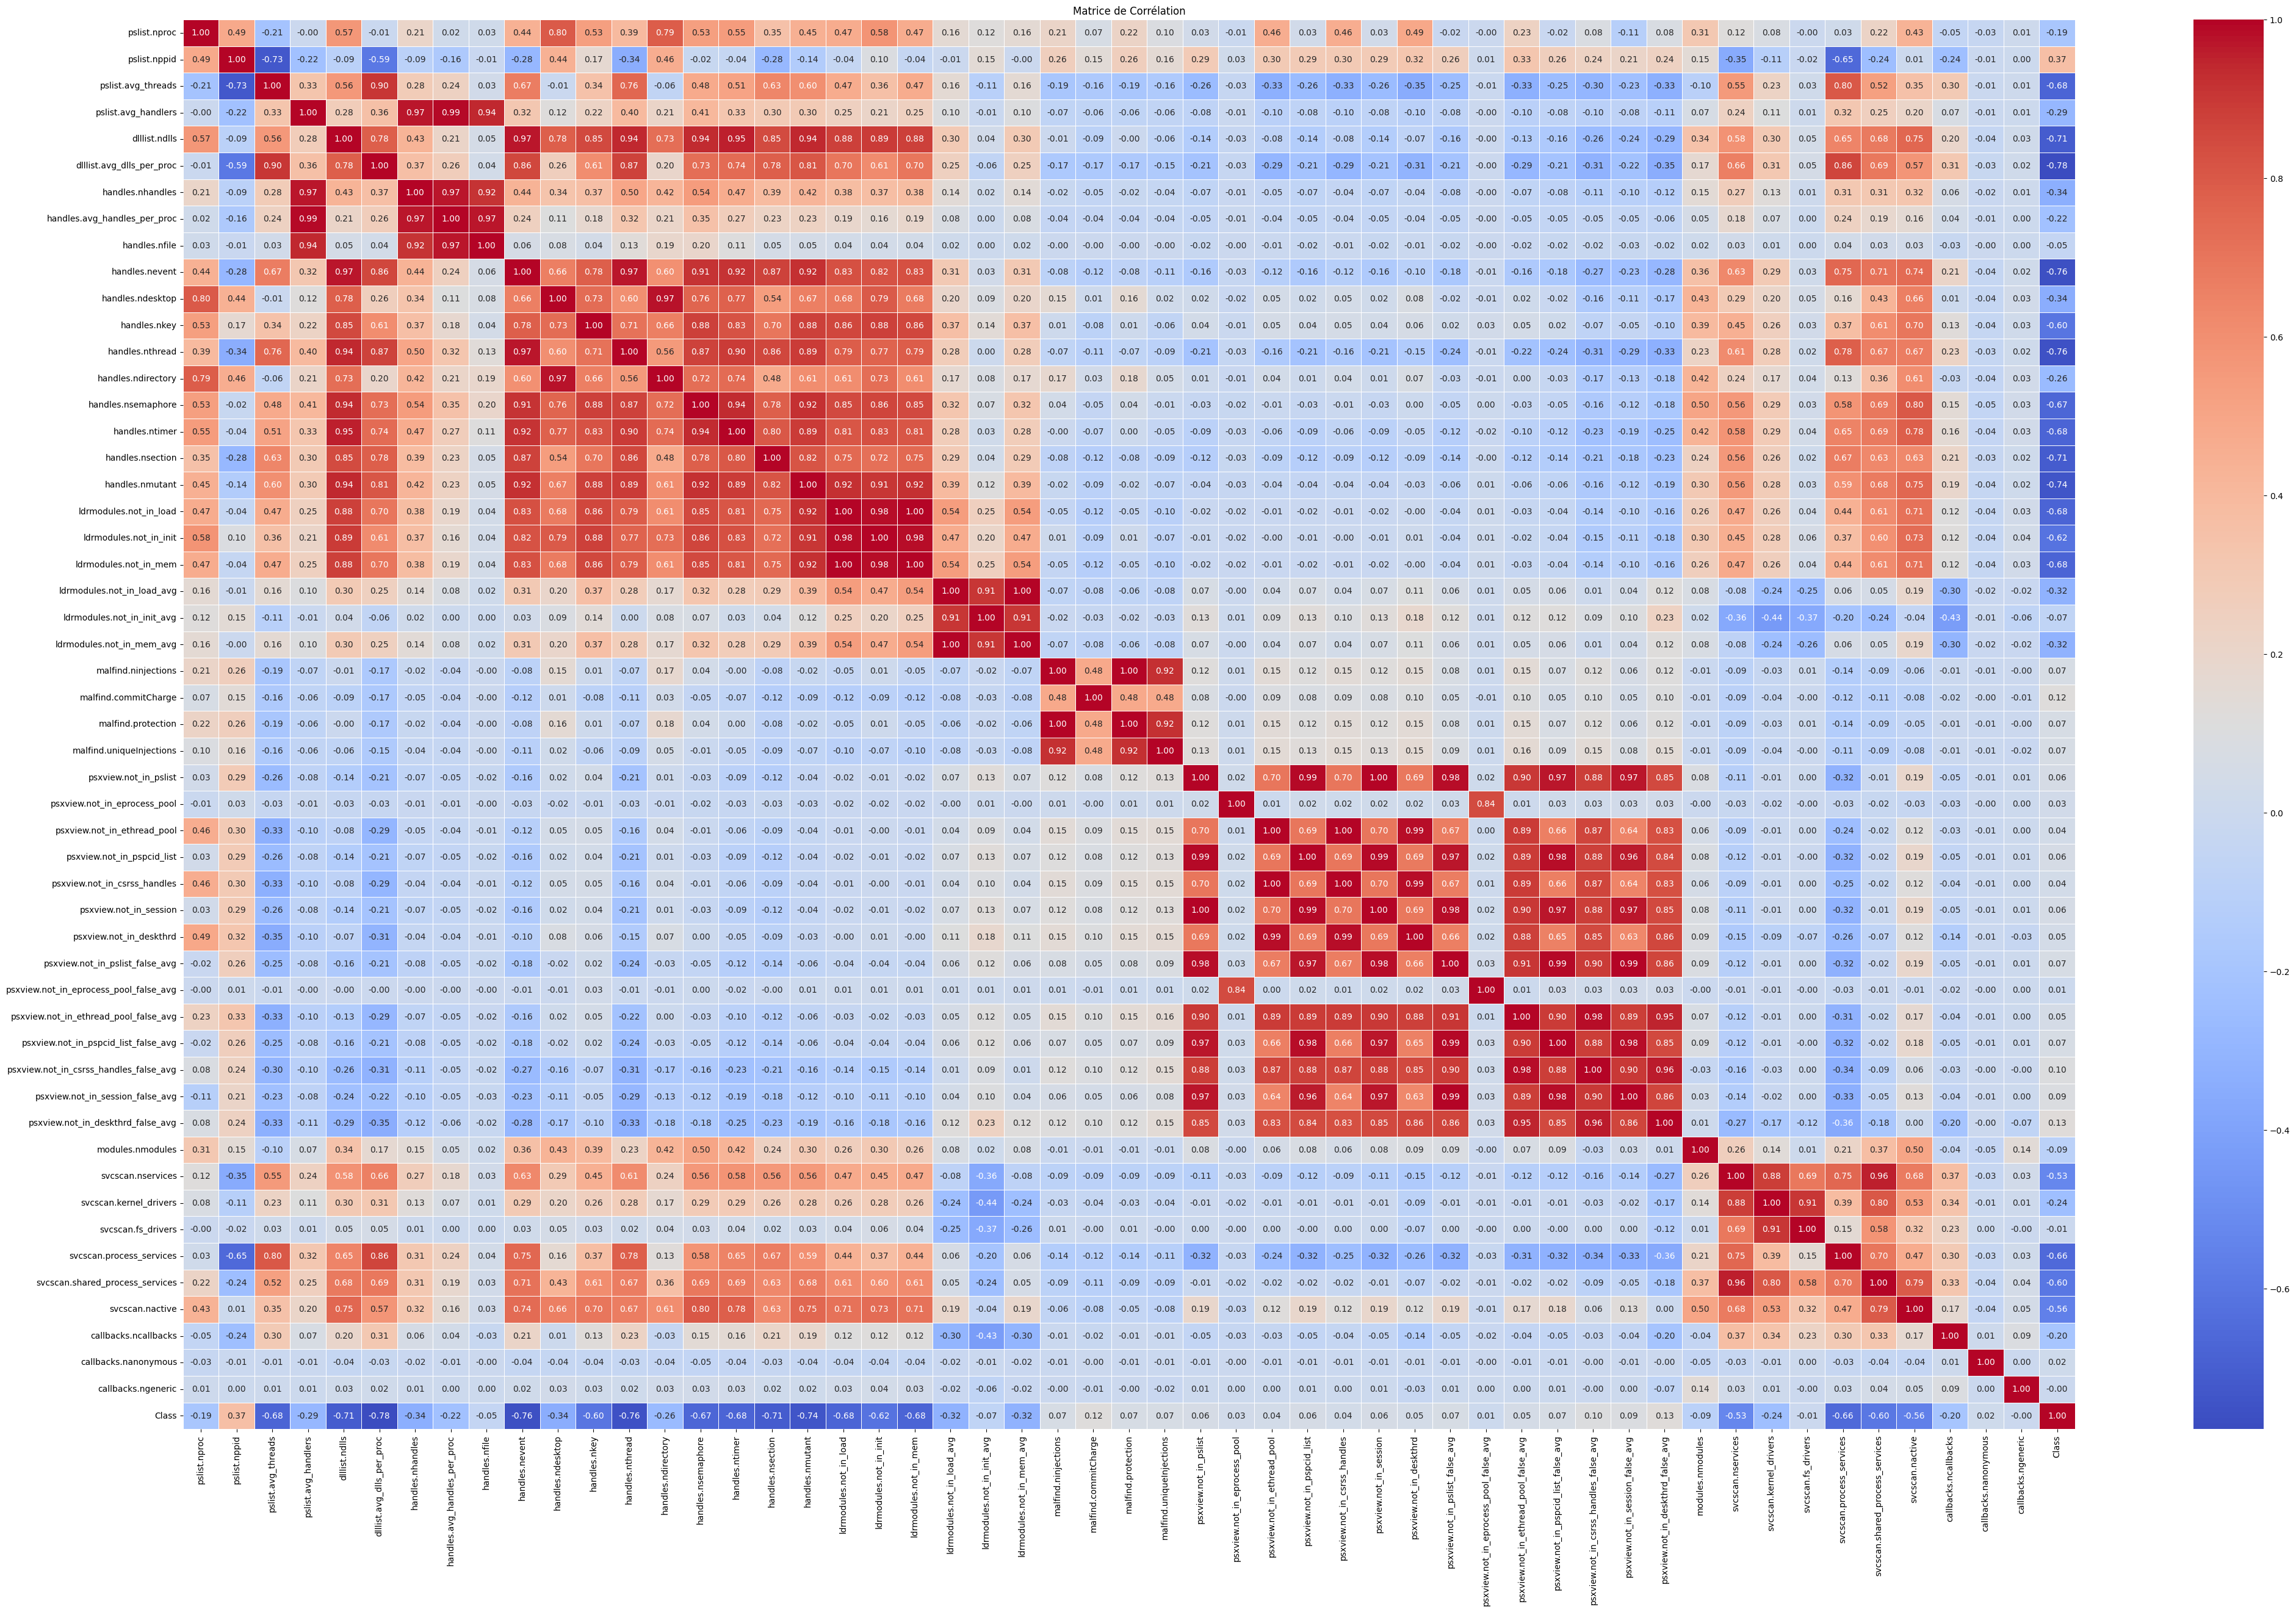

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la matrice de corrélation
correlation_matrix = td.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [ ]:
# Identification des paires de caractéristiques ayant une corrélation supérieure à 0.85
# Crée une copie de la matrice de corrélation sans les diagonales (celles qui sont égales à 1)
corr_matrix_no_diag = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Trouve les paires de colonnes dont la corrélation est supérieure à 0.85
to_drop = [column for column in corr_matrix_no_diag.columns if any(corr_matrix_no_diag[column] > 0.85)]

print(f"Colonnes à supprimer : {to_drop}")


# Suppression des colonnes fortement corrélées

td_dropped = td.drop(columns=to_drop)

td_dropped.head()

Colonnes à supprimer : ['dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg', 'svcscan.kernel_drivers', 'svcscan.fs_drivers', 'svcscan.process_services', 'svcscan.shared_process_services']


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0            45            17           10.555556           202.844444   
1            47            19           11.531915           242.234043   
2            40            14           14.725000           288.225000   
3            32            13           13.500000           264.281250   
4            42            16           11.452381           281.333333   

   dlllist.ndlls  handles.ndesktop  ldrmodules.not_in_load_avg  \
0           1694                46                    0.030372   
1           2074                51                    0.036167   
2           1932                45                    0.026114   
3           1445                36                    0.021483   
4           2067                45                    0.047820   

   malfind.ninjections  malfind.commitCharge  psxview.not_in_pslist  \
0                    5                    21                      2   
1                   12                    77                      0   
2                    5                     6                      0   
3                    2                     2                      0   
4                   12                    77                      4   

   psxview.not_in_eprocess_pool  psxview.not_in_ethread_pool  \
0                             0                            3   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            4   

   psxview.not_in_eprocess_pool_false_avg  modules.nmodules  \
0                                     0.0               138   
1                                     0.0               138   
2                                     0.0               137   
3                                     0.0               138   
4                                     0.0               138   

   svcscan.nservices  svcscan.nactive  callbacks.ncallbacks  \
0                389              121                    87   
1                392              122                    87   
2                395              120                    88   
3                395              120                    88   
4                392              124                    87   

   callbacks.nanonymous  callbacks.ngeneric  Class  
0                     0                   8      0  
1                     0                   8      0  
2                     0                   8      0  
3                     0                   8      0  
4                     0                   8      0

In [ ]:
print(td_dropped.columns)

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'handles.ndesktop',
       'ldrmodules.not_in_load_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_eprocess_pool_false_avg', 'modules.nmodules',
       'svcscan.nservices', 'svcscan.nactive', 'callbacks.ncallbacks',
       'callbacks.nanonymous', 'callbacks.ngeneric', 'Class'],
      dtype='object')


In [ ]:
X= td_dropped.drop("Class", axis=1)
y= td_dropped["Class"]

**Reseau de Neurone**

Classes détectées : [0 1 2 3]
Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3878 - loss: 14.8877 - val_accuracy: 0.5320 - val_loss: 1.7439 - learning_rate: 0.0010
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5231 - loss: 2.3041 - val_accuracy: 0.5830 - val_loss: 1.5850 - learning_rate: 0.0010
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5454 - loss: 1.7208 - val_accuracy: 0.5803 - val_loss: 1.5143 - learning_rate: 0.0010
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5682 - loss: 1.6350 - val_accuracy: 0.6134 - val_loss: 1.4628 - learning_rate: 0.0010
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5733 - loss: 1.5418 - val_accuracy: 0.6143 - val_loss: 1.4097 - learning_rate: 0.0010
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5723 - loss: 1.4596 - val_accuracy: 0.6088 - val_loss: 1.3653 - learning_rate: 0.0010
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc

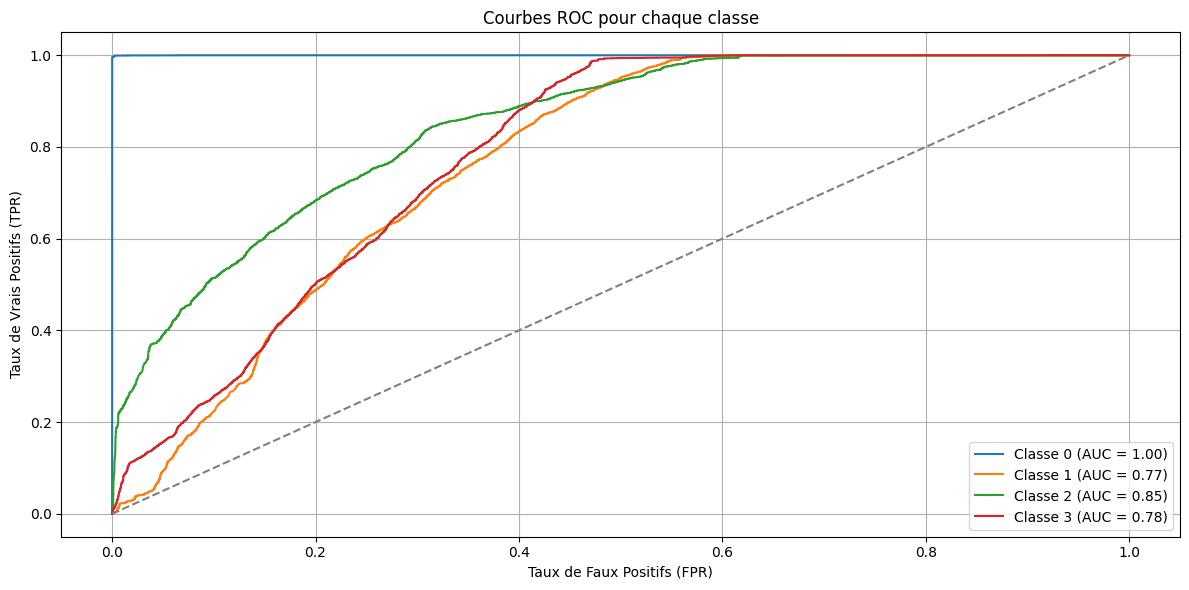


Matrice de confusion (Ensemble de test) :
[[5832    0   22    0]
 [   0   45  884 3688]
 [  18   63 2484 2237]
 [   0   18  671 4093]]

Rapport de classification (Ensemble de test) :
              precision    recall  f1-score   support

    Classe 0       1.00      1.00      1.00      5854
    Classe 1       0.36      0.01      0.02      4617
    Classe 2       0.61      0.52      0.56      4802
    Classe 3       0.41      0.86      0.55      4782

    accuracy                           0.62     20055
   macro avg       0.59      0.59      0.53     20055
weighted avg       0.62      0.62      0.56     20055



In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import Orthogonal
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import RobustScaler, LabelBinarizer

# Fixer la graine aléatoire pour reproductibilité
np.random.seed(1)
tf.random.set_seed(1)

# Prétraitement des données
sme = SMOTEENN(random_state=1)
X_res, y_res = sme.fit_resample(X, y)

# Division des données (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=1, stratify=y_res
)

# Normalisation
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encodage des labels pour la classification multiclasse
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Vérification des classes
print(f"Classes détectées : {lb.classes_}")

# Création du modèle pour classification multiclasse
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(56, activation='relu', kernel_initializer=Orthogonal(seed=1), kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer=Orthogonal(seed=1), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer=Orthogonal(seed=1), kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_initializer=Orthogonal(seed=1), kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(len(lb.classes_), activation='softmax')  # Sortie multiclasse
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

# Entraînement du modèle
history = model.fit(
    X_train, y_train_bin,
    validation_split=0.1,
    epochs=50,
    batch_size=228,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Prédictions sur l'ensemble de test
y_test_pred_prob = model.predict(X_test)

# Calcul des courbes ROC et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracé des courbes ROC
plt.figure(figsize=(12, 6))

for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Classe {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de hasard
plt.title('Courbes ROC pour chaque classe')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# Rapport de classification et matrice de confusion
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_bin_labels = np.argmax(y_test_bin, axis=1)

print("\nMatrice de confusion (Ensemble de test) :")
print(confusion_matrix(y_test_bin_labels, y_test_pred))
print("\nRapport de classification (Ensemble de test) :")
print(classification_report(y_test_bin_labels, y_test_pred, target_names=[f'Classe {i}' for i in lb.classes_]))


**Regression Logistique**


Précision sur l'ensemble d'entraînement : 0.66

Matrice de confusion sur l'ensemble d'entraînement :
[[23351     2    57     1]
 [    2  8206  3106  7087]
 [   89  4066  8765  6352]
 [    1  4466  2098 12524]]

Rapport de classification sur l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23411
           1       0.49      0.45      0.47     18401
           2       0.62      0.45      0.53     19272
           3       0.48      0.66      0.56     19089

    accuracy                           0.66     80173
   macro avg       0.65      0.64      0.64     80173
weighted avg       0.67      0.66      0.66     80173


Précision sur l'ensemble de test : 0.66

Matrice de confusion sur l'ensemble de test :
[[5838    1   14    0]
 [   0 2064  830 1706]
 [  23 1092 2136 1568]
 [   1 1148  526 3097]]

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

       

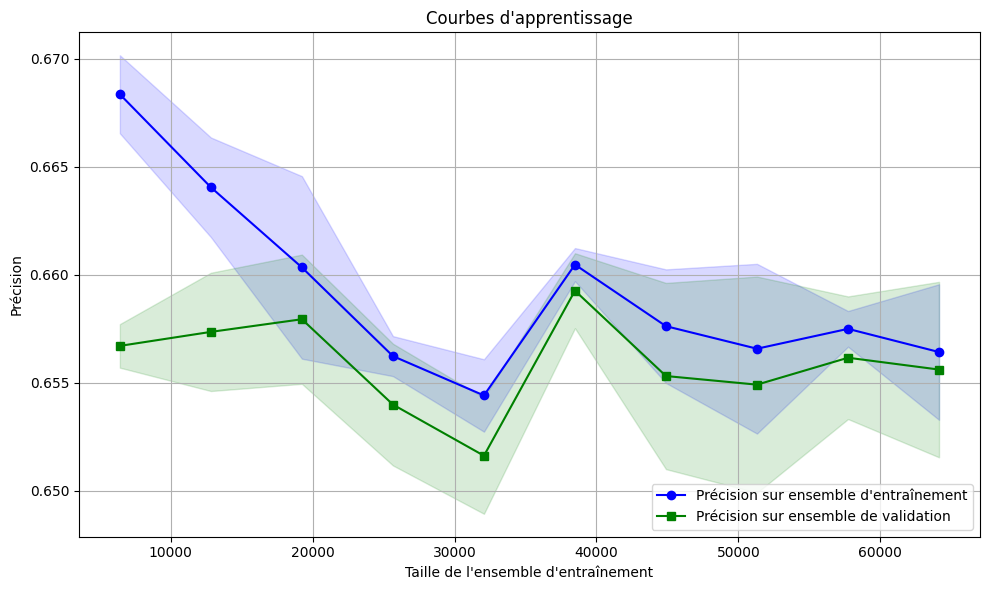

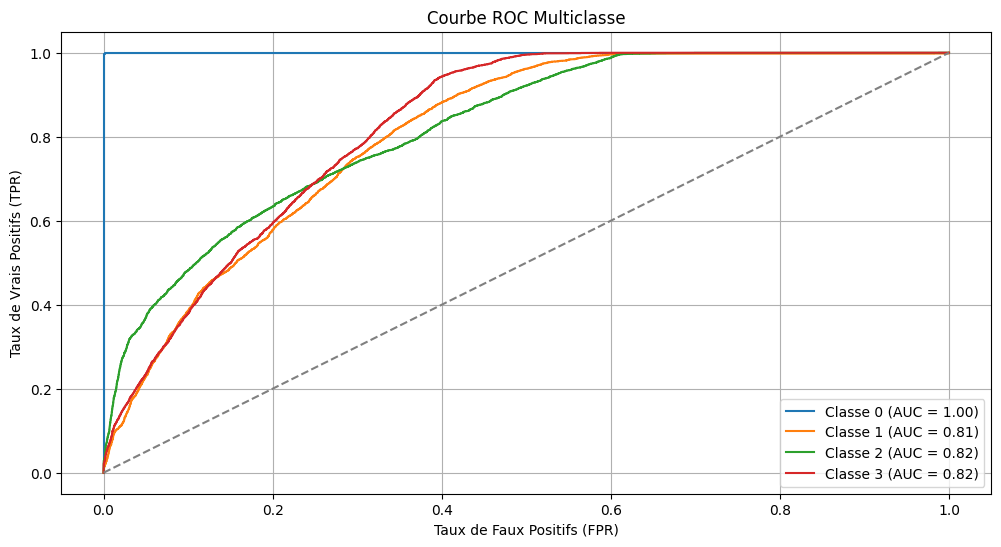

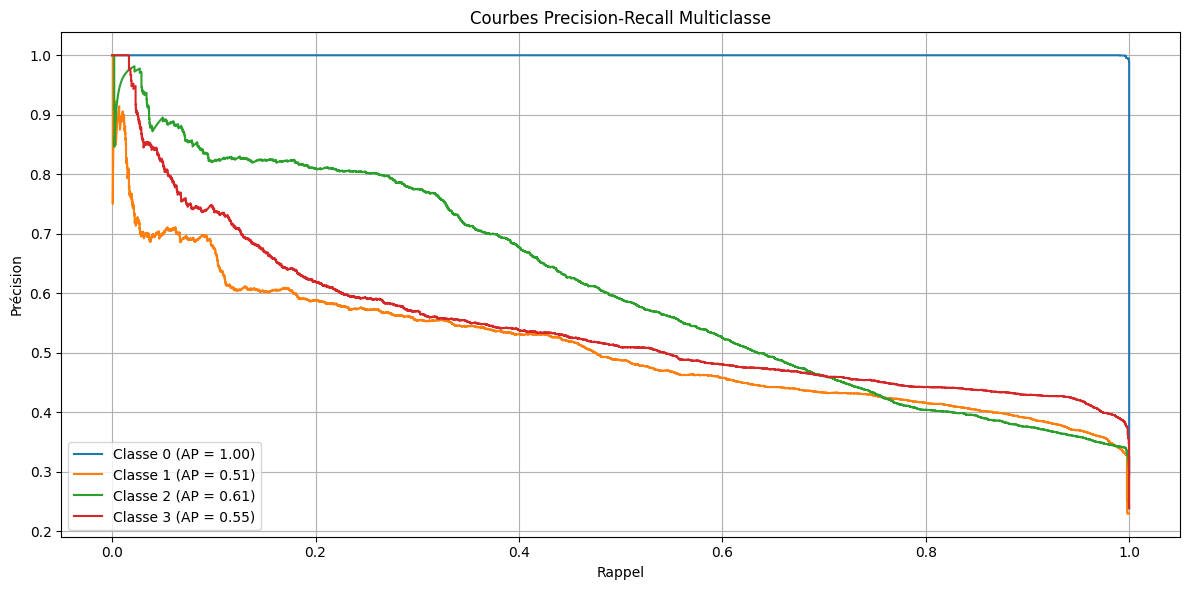

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Suppression des avertissements
import warnings
warnings.filterwarnings("ignore")

# Appliquer SMOTEENN pour traiter le déséquilibre
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1, stratify = y_res)

# Mise à l'échelle des données
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèle de régression logistique
model1 = LogisticRegression(
    penalty='l2', dual=False, tol=1e-4, C=1, fit_intercept=True,
    intercept_scaling=1, class_weight=None, solver='liblinear',
    max_iter=100, multi_class='ovr', verbose=0, warm_start=False,
    n_jobs=None, l1_ratio=None
)

# Entraînement du modèle
model1.fit(X_train, y_train)

# Évaluation sur les données d'entraînement
y_train_pred = model1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nPrécision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
train_CM = confusion_matrix(y_train, y_train_pred)
print("\nMatrice de confusion sur l'ensemble d'entraînement :")
print(train_CM)
train_report = classification_report(y_train, y_train_pred)
print("\nRapport de classification sur l'ensemble d'entraînement :")
print(train_report)

# Évaluation sur les données de test
y_test_pred = model1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nPrécision sur l'ensemble de test : {test_accuracy:.2f}")
test_CM = confusion_matrix(y_test, y_test_pred)
print("\nMatrice de confusion sur l'ensemble de test :")
print(test_CM)
test_report = classification_report(y_test, y_test_pred)
print("\nRapport de classification sur l'ensemble de test :")
print(test_report)

# Courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model1,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calcul des moyennes et écarts types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Précision sur ensemble d\'entraînement', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)
plt.plot(train_sizes, test_mean, label='Précision sur ensemble de validation', color='green', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.15)
plt.title('Courbes d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Précision')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

# Calcul des probabilités pour chaque classe
y_test_proba = model1.predict_proba(X_test)

# Binarisation des labels pour calculer les courbes ROC et Precision-Recall
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Tracé des courbes ROC pour chaque classe
plt.figure(figsize=(12, 6))
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

# Ligne de hasard
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Courbe ROC Multiclasse')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.grid()

# Tracé des courbes Precision-Recall pour chaque classe
plt.figure(figsize=(12, 6))
precision = {}
recall = {}
average_precision = {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_test_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_test_proba[:, i])
    plt.plot(recall[i], precision[i], label=f'Classe {i} (AP = {average_precision[i]:.2f})')

plt.title('Courbes Precision-Recall Multiclasse')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()


**KPPV**


Précision sur l'ensemble d'entraînement : 1.00

Matrice de confusion (Ensemble d'entraînement) :
[[23312     0     0     0]
 [    0 18464     0     0]
 [    0     0 19238     0]
 [    0     0     0 19159]]

Rapport de classification (Ensemble d'entraînement) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23312
           1       1.00      1.00      1.00     18464
           2       1.00      1.00      1.00     19238
           3       1.00      1.00      1.00     19159

    accuracy                           1.00     80173
   macro avg       1.00      1.00      1.00     80173
weighted avg       1.00      1.00      1.00     80173


Précision sur l'ensemble de test : 0.89

Matrice de confusion (Ensemble de test) :
[[5951    0    1    0]
 [   0 3699  374  464]
 [   0  348 4186  319]
 [   0  455  326 3921]]

Rapport de classification (Ensemble de test) :
              precision    recall  f1-score   support

           0       1.00

ValueError: multiclass format is not supported

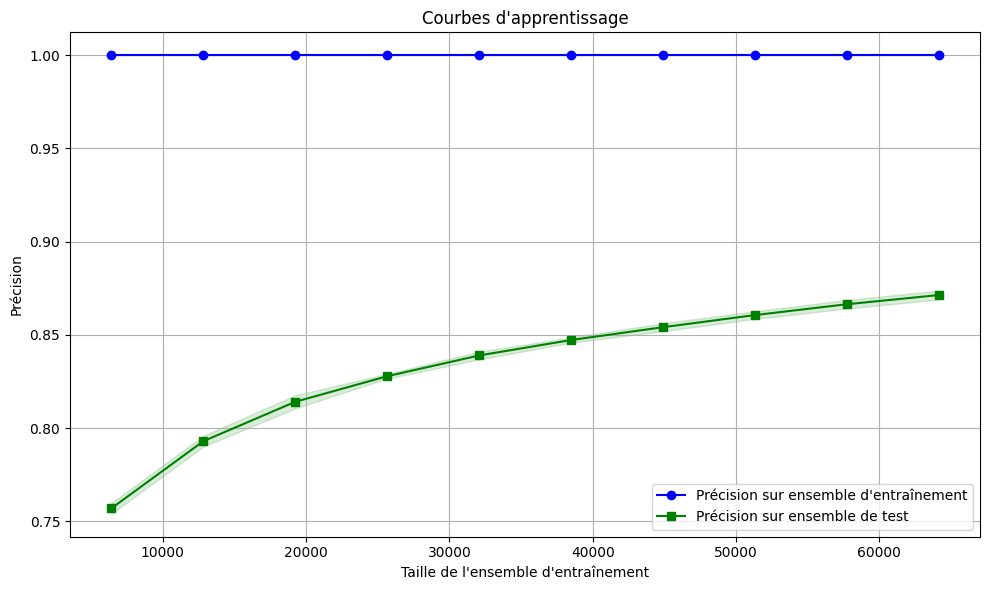

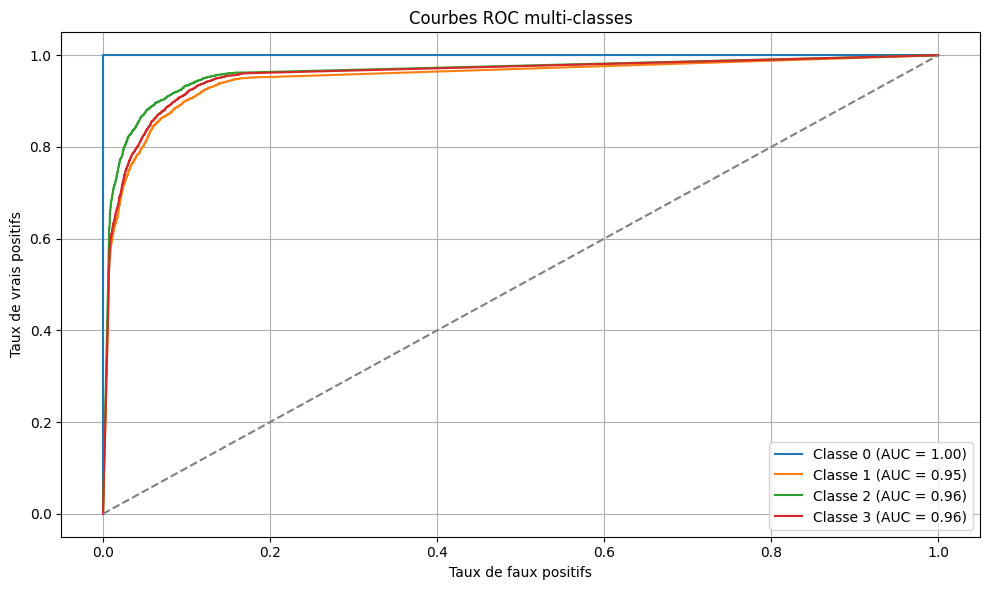

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve, train_test_split
import matplotlib.pyplot as plt
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import RobustScaler, label_binarize

# Prétraitement des données avec SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1, stratify=y_res)

# Normalisation des données
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèle KNN
model2 = KNeighborsClassifier(
    n_neighbors=5, weights="distance", algorithm="auto", leaf_size=30,
    p=2, metric="minkowski", metric_params=None, n_jobs=None
)

# Entraînement du modèle
model2.fit(X_train, y_train)

# Évaluation sur l'ensemble d'entraînement
y_train_pred = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nPrécision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print("\nMatrice de confusion (Ensemble d'entraînement) :")
print(confusion_matrix(y_train, y_train_pred))
print("\nRapport de classification (Ensemble d'entraînement) :")
print(classification_report(y_train, y_train_pred))

# Évaluation sur l'ensemble de test
y_test_pred = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nPrécision sur l'ensemble de test : {test_accuracy:.2f}")
print("\nMatrice de confusion (Ensemble de test) :")
print(confusion_matrix(y_test, y_test_pred))
print("\nRapport de classification (Ensemble de test) :")
print(classification_report(y_test, y_test_pred))

# Courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model2,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracé des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Précision sur ensemble d'entraînement", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.15)
plt.plot(train_sizes, test_mean, label="Précision sur ensemble de test", color="green", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.15)

plt.title("Courbes d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Précision")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Binarisation des labels pour le calcul des métriques multi-classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_test_probs = model2.predict_proba(X_test)

# Tracé des courbes ROC pour chaque classe
plt.figure(figsize=(10, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Courbes ROC multi-classes")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Tracé des courbes Precision-Recall pour chaque classe
plt.figure(figsize=(10, 6))
average_precision = {}
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_test_probs[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_test_probs[:, i])
    average_precision[i] = avg_precision
    plt.plot(recall, precision, label=f'Classe {i} (AP = {avg_precision:.2f})')

plt.title("Courbes Precision-Recall multi-classes")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()


**Foret Aleatoire**


Précision sur l'ensemble d'entraînement : 1.00

Matrice de confusion (Ensemble d'entraînement) :
[[23312     0     0     0]
 [    0 18464     0     0]
 [    0     0 19238     0]
 [    0     0     0 19159]]

Rapport de classification (Ensemble d'entraînement) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23312
           1       1.00      1.00      1.00     18464
           2       1.00      1.00      1.00     19238
           3       1.00      1.00      1.00     19159

    accuracy                           1.00     80173
   macro avg       1.00      1.00      1.00     80173
weighted avg       1.00      1.00      1.00     80173


Précision sur l'ensemble de test : 0.96

Matrice de confusion (Ensemble de test) :
[[5951    0    1    0]
 [   0 4261  104  172]
 [   0   87 4635  131]
 [   0  160   81 4461]]

Rapport de classification (Ensemble de test) :
              precision    recall  f1-score   support

           0       1.00

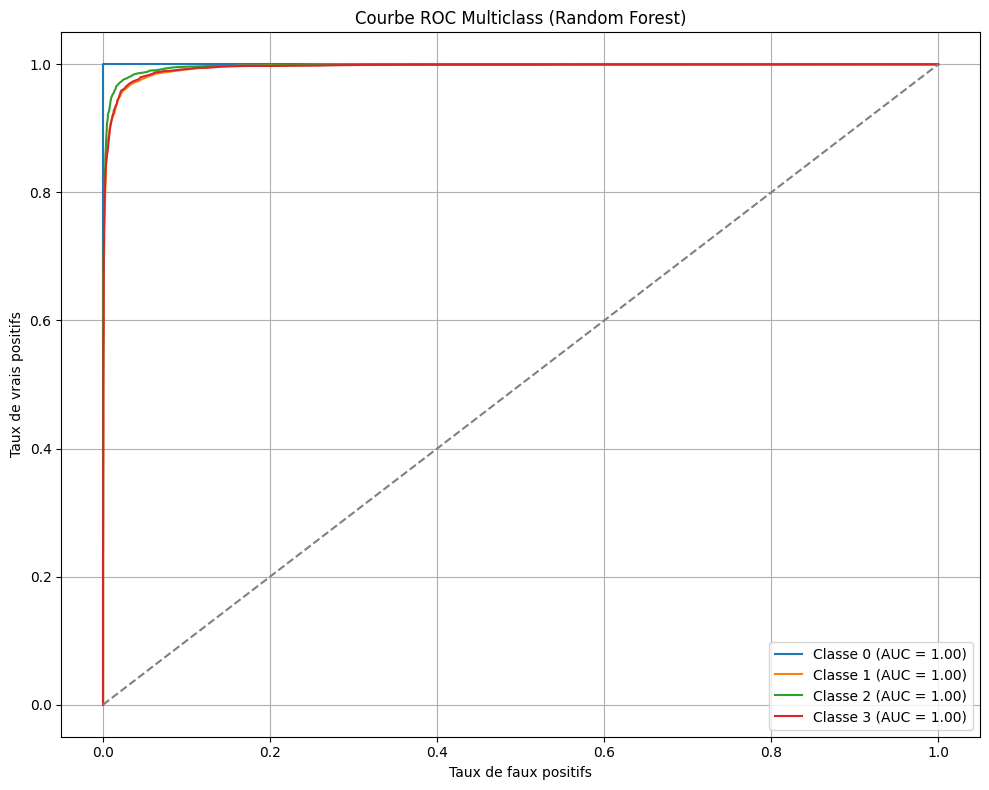

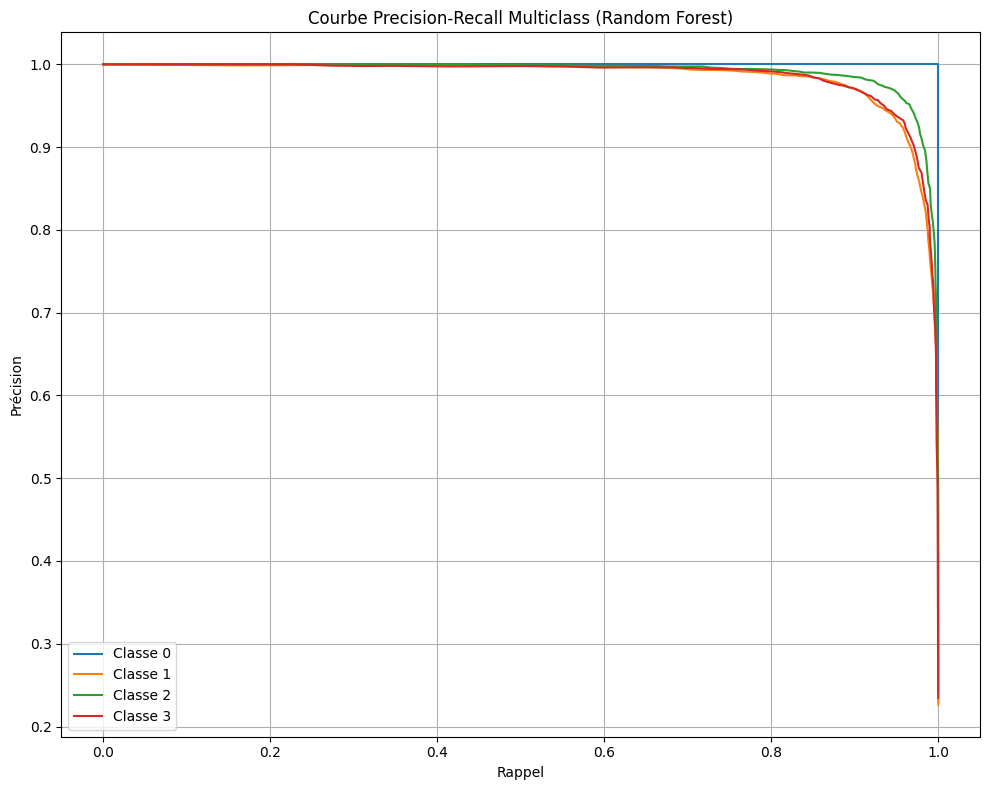

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


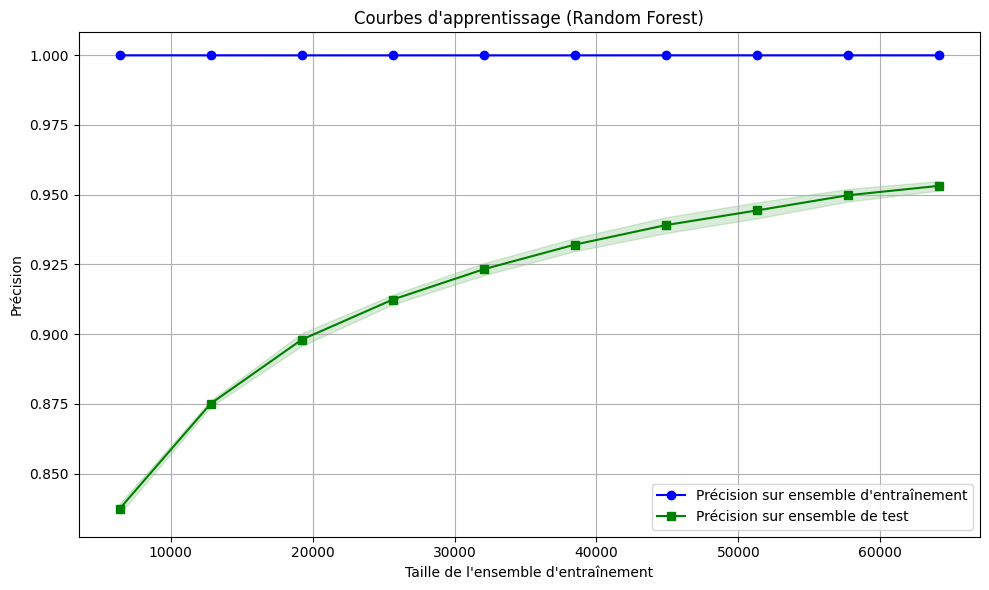

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer, RobustScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données
X = td.drop("Class", axis=1)
y = td["Class"]

# Application de SMOTEENN
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

# Division des données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

# Mise à l'échelle des données
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création du modèle Random Forest
model3 = RandomForestClassifier(
    n_estimators=100,  # Nombre d'arbres
    criterion='gini',  # Fonction d'impureté
    max_depth=None,  # Profondeur maximale des arbres
    random_state=42,  # Reproductibilité
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Entraînement du modèle
model3.fit(X_train, y_train)

# Évaluation sur l'ensemble d'entraînement
y_train_pred = model3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nPrécision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print("\nMatrice de confusion (Ensemble d'entraînement) :")
print(confusion_matrix(y_train, y_train_pred))
print("\nRapport de classification (Ensemble d'entraînement) :")
print(classification_report(y_train, y_train_pred))

# Évaluation sur l'ensemble de test
y_test_pred = model3.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nPrécision sur l'ensemble de test : {test_accuracy:.2f}")
print("\nMatrice de confusion (Ensemble de test) :")
print(confusion_matrix(y_test, y_test_pred))
print("\nRapport de classification (Ensemble de test) :")
print(classification_report(y_test, y_test_pred))

# Binarisation des étiquettes pour la classification multiclasse
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_test_probs3 = model3.predict_proba(X_test)  # Probabilités pour toutes les classes
classes = lb.classes_

# Tracé des courbes ROC pour chaque classe
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_probs3[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {class_name} (AUC = {roc_auc:.2f})")

# Ligne diagonale
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Courbe ROC Multiclass (Random Forest)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Tracé des courbes Precision-Recall pour chaque classe
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_probs3[:, i])
    plt.plot(recall, precision, label=f"Classe {class_name}")

plt.title("Courbe Precision-Recall Multiclass (Random Forest)")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()

# Courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model3,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Précision sur ensemble d'entraînement", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.15)
plt.plot(train_sizes, test_mean, label="Précision sur ensemble de test", color="green", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.15)

plt.title("Courbes d'apprentissage (Random Forest)")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Précision")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


**Classificateur de Bayes**


Précision sur l'ensemble d'entraînement : 0.4579645466104864

Précision sur l'ensemble de test : 0.4675143355771628

Matrice de confusion (test) :
 [[5964    0    0    6]
 [1565   84 1539 1408]
 [1980   25 1373 1445]
 [1222   21 1468 1955]]

Rapport de classification (test) :
               precision    recall  f1-score   support

           0       0.56      1.00      0.71      5970
           1       0.65      0.02      0.04      4596
           2       0.31      0.28      0.30      4823
           3       0.41      0.42      0.41      4666

    accuracy                           0.47     20055
   macro avg       0.48      0.43      0.37     20055
weighted avg       0.48      0.47      0.39     20055



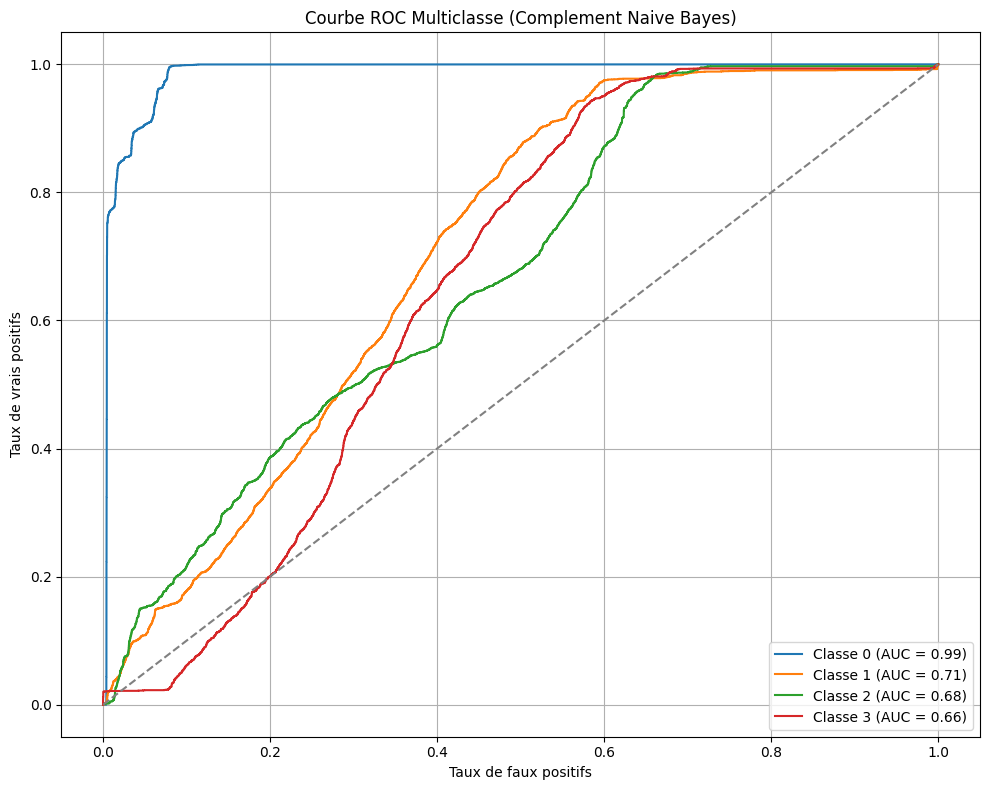

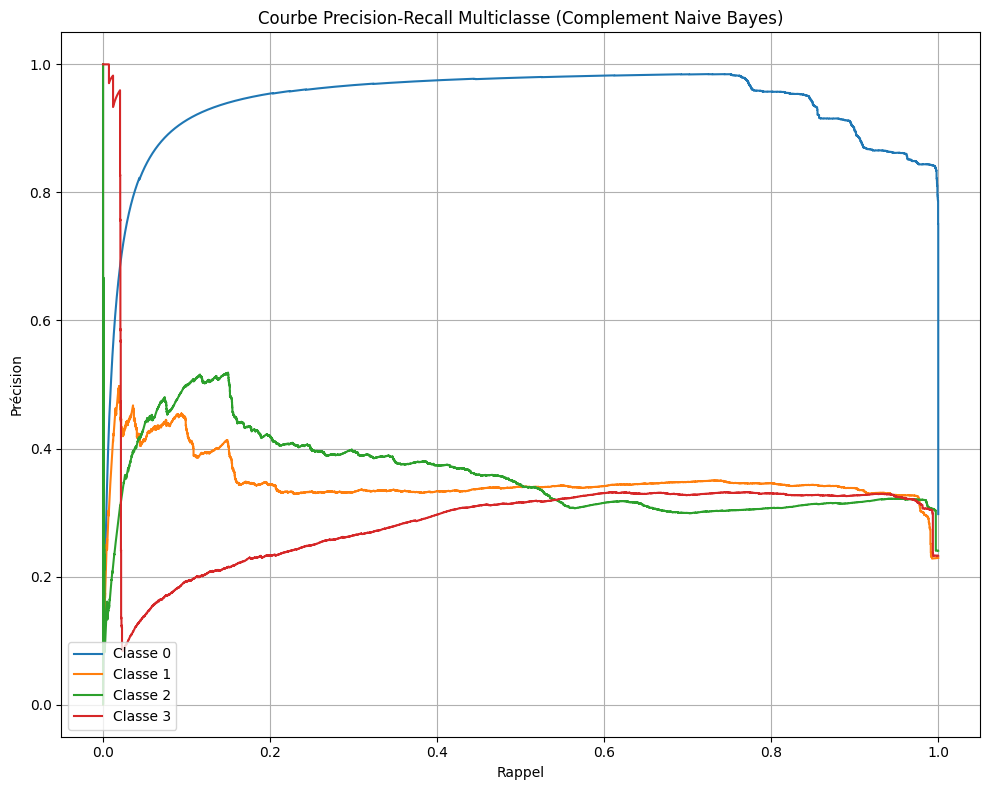

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer, RobustScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Exemple de préparation des données
sme = SMOTEENN(random_state=1)
X_res, y_res = sme.fit_resample(X, y)

# Division des données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

# Mise à l'échelle des données
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prendre la valeur absolue des données pour ComplementNB
X_train_abs = np.abs(X_train)
X_test_abs = np.abs(X_test)

# Création et entraînement du modèle
model4 = ComplementNB(alpha=1.0, norm=True)
model4.fit(X_train_abs, y_train)

# Prédictions
y_train_pred = model4.predict(X_train_abs)
y_test_pred = model4.predict(X_test_abs)

# Affichage des scores
print("\nPrécision sur l'ensemble d'entraînement :", accuracy_score(y_train, y_train_pred))
print("\nPrécision sur l'ensemble de test :", accuracy_score(y_test, y_test_pred))
print("\nMatrice de confusion (d'entrainement) :\n", confusion_matrix(y_train, y_train_pred))
print("\nRapport de classification (test) :\n", classification_report(y_train, y_train_pred))
print("\nMatrice de confusion (test) :\n", confusion_matrix(y_test, y_test_pred))
print("\nRapport de classification (test) :\n", classification_report(y_test, y_test_pred))

# Obtenir les probabilités de prédiction
y_test_probs = model4.predict_proba(X_test_abs)

# Binarisation des étiquettes pour la stratégie un-versus-tous
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Classes cibles
classes = lb.classes_

# Courbes ROC multiclasse
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {class_name} (AUC = {roc_auc:.2f})")

# Ligne diagonale
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.title("Courbe ROC Multiclasse (Complement Naive Bayes)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Courbes Precision-Recall multiclasse
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_probs[:, i])
    plt.plot(recall, precision, label=f"Classe {class_name}")

plt.title("Courbe Precision-Recall Multiclasse (Complement Naive Bayes)")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()


Exactitude (train): 1.0000
Exactitude (test): 0.9619


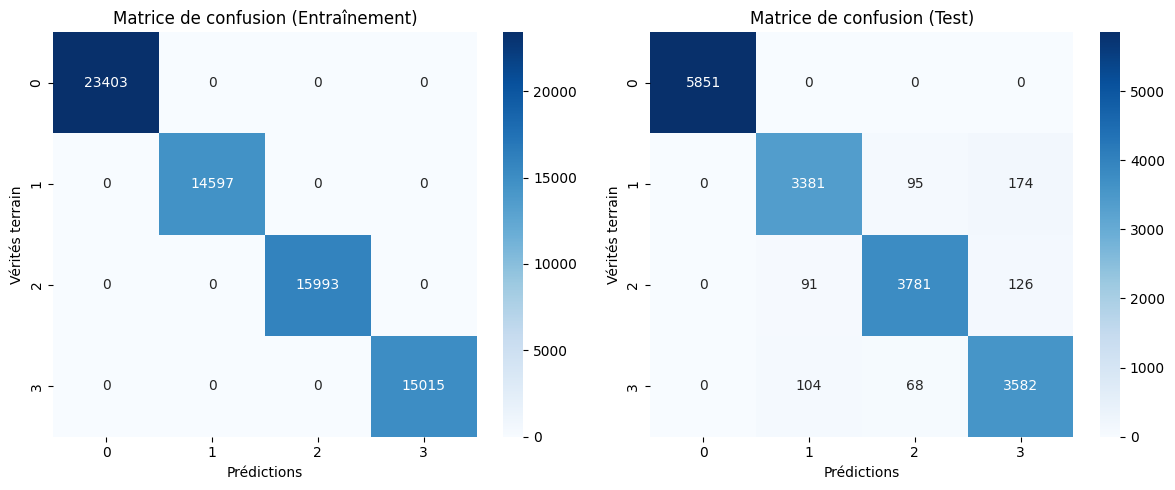


Rapport de classification (Ensemble d'entraînement):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23403
           1       1.00      1.00      1.00     14597
           2       1.00      1.00      1.00     15993
           3       1.00      1.00      1.00     15015

    accuracy                           1.00     69008
   macro avg       1.00      1.00      1.00     69008
weighted avg       1.00      1.00      1.00     69008


Rapport de classification (Ensemble de test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5851
           1       0.95      0.93      0.94      3650
           2       0.96      0.95      0.95      3998
           3       0.92      0.95      0.94      3754

    accuracy                           0.96     17253
   macro avg       0.96      0.96      0.96     17253
weighted avg       0.96      0.96      0.96     17253



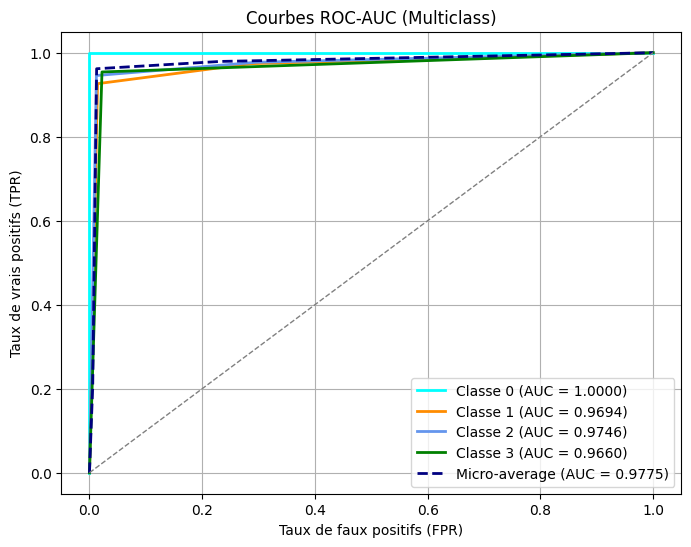

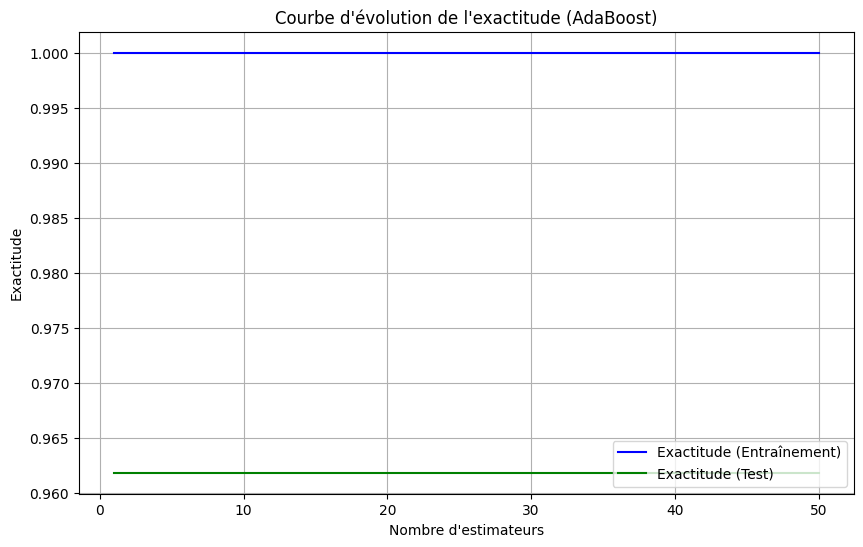

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle
import pickle
import joblib
import warnings

# Fixer la graine pour la reproductibilité
np.random.seed = 1

# Filtrer les avertissements de type FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Chargement des données (exemple)
# Assurez-vous de charger un dataset valide
# td = pd.read_csv("votre_fichier.csv")
# Exemple : X = td.drop("Class", axis=1), y = td["Class"]
#X = td.drop("Class", axis=1)
#y = td["Class"]

# Appliquer SMOTEENN pour équilibrer les classes
sme = SMOTEENN(random_state=1)
X_res, y_res = sme.fit_resample(X, y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1, stratify=y_res)

# Mise à l'échelle des données
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir l'estimateur faible (Random Forest)
weak_learner = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    random_state=1,
    n_jobs=-1
)

# Entraîner le modèle AdaBoost avec l'estimateur faible
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    algorithm="SAMME",  # Utiliser SAMME.R pour les tâches multiclasses
    random_state=1
).fit(X_train, y_train)

# Calcul de l'exactitude
y_train_pred = adaboost_clf.predict(X_train)
y_test_pred = adaboost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Exactitude (train): {train_accuracy:.4f}")
print(f"Exactitude (test): {test_accuracy:.4f}")

# Matrices de confusion
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Affichage des matrices de confusion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion (Entraînement)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion (Test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")

plt.tight_layout()
plt.show()

# Rapport de classification
print("\nRapport de classification (Ensemble d'entraînement):")
print(classification_report(y_train, y_train_pred))

print("\nRapport de classification (Ensemble de test):")
print(classification_report(y_test, y_test_pred))

# Courbes ROC-AUC pour le test
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

y_test_proba = adaboost_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_proba.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_test_proba, average="micro")

plt.figure(figsize=(8, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Classe {i} (AUC = {roc_auc[i]:.4f})")

plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.4f})", color="navy", linestyle="--", linewidth=2)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=1)
plt.title("Courbes ROC-AUC (Multiclass)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Courbe d'évolution de l'exactitude (learning curve)
estimators_range = range(1, adaboost_clf.n_estimators + 1)
train_acc = []
test_acc = []

for n_estimators in estimators_range:
    # Réentraîner un modèle partiel
    partial_model = AdaBoostClassifier(
        estimator=weak_learner,
        n_estimators=n_estimators,
        algorithm="SAMME.R",
        random_state=1
    ).fit(X_train, y_train)

    # Ajouter les exactitudes
    train_acc.append(accuracy_score(y_train, partial_model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, partial_model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_acc, label="Exactitude (Entraînement)", color="blue")
plt.plot(estimators_range, test_acc, label="Exactitude (Test)", color="green")
plt.title("Courbe d'évolution de l'exactitude (AdaBoost)")
plt.xlabel("Nombre d'estimateurs")
plt.ylabel("Exactitude")
plt.legend(loc="lower right")
plt.grid()
plt.show()

with open("mod_rfcor.joblib", "wb") as f:
    joblib.dump(adaboost_clf, f)

from google.colab import files
files.download("mod_rfcor.joblib")
